# **<center>Practical Implementation </center>**


## <center> Solution Programming Session 3 - Graph Representation Learning </center>

<table class="tfo-notebook-buttons" align="center">
  <td>
    <a target="_blank" href="https://hm-ai.github.io/ml-enpc/">
    <img src="https://drive.google.com/uc?export=view&id=12t-JTO4co2ZDxqdmNOOZG104izf5bSye" height="50"/>
    Course page</a>
</td>
  <td>
    <a target="_blank" href="https://colab.research.google.com/drive/1HNYs1gmFp3Z3ZV8MohDQPKyER32ZYyF5?usp=sharing"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" height="50" />Run in Google Colab</a>
  </td>
</table>


# Creating and Visualizing a Graph

### Description of the Graph
This graph represents a group of students and their connections (friendships). Each node corresponds to a student, and the edges represent relationships between them. The features associated with each node indicate the marks of the student on their last three quizzes. The labels indicate whether a student is predicted to fail (0) or pass (1) the final exam.

<center><img width=“700" src = "https://drive.google.com/uc?export=view&id=1qF3KCv7cvm_4HZ-bef2k2wbWPC1n5foo"></center>



The objective of this session is to create this graph step by step and visualize it. By the end of the session, you will have a graph with:
- Nodes representing students.
- Edges representing connections between students.
- Features representing quiz marks.
- Labels representing their predicted success or failure.

In [ ]:
!pip install torch torchvision torchaudio
!pip install torch-geometric

In [ ]:
import numpy as np
import torch
from torch_geometric.data import Data
import networkx as nx
from torch_geometric.utils.convert import to_networkx

### Step 1: Defining the Edge List

---
<font color=green>Q1:</font>
<br><font color='green'>
Define the edges of the graph. Each edge connects two nodes and is represented by a pair of source and target nodes. Write a tensor for the edge list.
</font>

---


The **edge list** specifies which nodes are connected by edges in the graph. Each edge is defined by a pair of source and target nodes. For example:


<details>
<summary>Click to see the code</summary>

```python
edge_list = torch.tensor([
    [...],  # Source Nodes
    [...]   # Target Nodes
], dtype=torch.long)
```

</details>

In [ ]:
edge_list = torch.tensor([
    [0, 0, 0, 1, 2, 3, 4, 5, 6, 7, 8],
    [1, 2, 9, 3, 4, 5, 6, 7, 8, 8, 9]
], dtype=torch.long)


### Step 2: Defining Node Features

---
<font color=green>Q2:</font>
<br><font color='green'>
Create a feature matrix for the nodes. Each node should have a feature vector of size 3, representing marks from three quizzes. Write a tensor for the feature matrix.
</font>

---

Each node has a feature vector that represents the quiz marks for a student.

<details>
<summary>Click to see the code</summary>

```python
node_features = ...
```

</details>


- **Shape**: `(num_nodes, num_features)`
- Each row represents a node, and each column represents a quiz mark.

In [ ]:
node_features = torch.tensor([
    [6, 3, 1],  # Node 0
    [9, 3, 1],  # Node 1
    [9, 7, 9],  # Node 2
    [2, 0, 5],  # Node 3
    [9, 3, 4],  # Node 4
    [9, 6, 2],  # Node 5
    [0, 6, 2],  # Node 6
    [7, 9, 7],  # Node 7
    [3, 3, 4],  # Node 8
    [3, 7, 0],  # Node 9
], dtype=torch.long)
node_features.shape

torch.Size([10, 3])


### Step 3: Defining Edge Weights

---
<font color=green>Q3:</font>
<br><font color='green'>
Assign weights to the edges. Each edge should have a numerical weight (e.g., strength of the connection). Write a tensor for the edge weights.
</font>

---


Edge weights represent the strength of the relationship between two students. For example:

<details>
<summary>Click to see the code</summary>

```python
edge_weight = ...
```

</details>


- **Shape**: `(num_edges,)`
- Each value corresponds to the weight of an edge.


In [ ]:
edge_weight = torch.tensor([
    24.0,  # Weight for edge (0, 1)
    06.0,  # Weight for edge (0, 2)
    38.0,  # Weight for edge (0, 9)
    48.0,  # Weight for edge (1, 3)
    40.0,  # Weight for edge (2, 4)
    21.0,  # Weight for edge (3, 5)
    20.0,  # Weight for edge (4, 6)
    18.0,  # Weight for edge (5, 7)
    43.0,  # Weight for edge (6, 8)
    27.0,  # Weight for edge (7, 8)
    15.0,  # Weight for edge (8, 9)
])
edge_weight.shape

torch.Size([11])


### Step 4: Defining Node Labels

---
<font color=green>Q4:</font>
<br><font color='green'>
Assign labels to each node. Labels indicate whether a student will fail (0) or pass (1) the final exam. Write a tensor for the node labels.
</font>

---


Each node has a binary label indicating the predicted outcome of the final exam. For example:


<details>
<summary>Click to see the code</summary>

```python
node_labels = ...
```

</details>


- **Shape**: `(num_nodes,)`
- Each value is either 0 (fail) or 1 (pass).


In [ ]:
node_labels = torch.tensor([0, 0, 0, 1, 1, 0, 1, 1, 0, 1], dtype=torch.int)

### Step 5: Creating the Graph

---
<font color=green>Q5:</font>
<br><font color='green'>
Combine the edge list, node features, edge weights, and node labels to create the graph using PyTorch Geometric's `Data` object.
</font>

---


Once all components are defined, you can create the graph:

<details>
<summary>Click to see the code</summary>

```python
from torch_geometric.data import Data

data = Data(x=..., edge_index=..., edge_attr=..., y=...)
```

</details>



In [ ]:
from torch_geometric.data import Data

data = Data(x=node_features, edge_index=edge_list, edge_attr=edge_weight, y=node_labels)

In [ ]:
# Print the shapes of the matrices
print("Shape of node features (x):", data.x.shape)
print("Shape of edge index (edge_index):", data.edge_index.shape)
print("Shape of edge weights (edge_attr):", data.edge_attr.shape)
print("Shape of node labels (y):", data.y.shape)

Shape of node features (x): torch.Size([10, 3])
Shape of edge index (edge_index): torch.Size([2, 11])
Shape of edge weights (edge_attr): torch.Size([11])
Shape of node labels (y): torch.Size([10])


### Step 6: Visualizing the Graph

---
<font color=green>Q:</font>
<br><font color='green'>
Visualize the graph. Use NetworkX and Matplotlib to plot the graph. Display node features inside the nodes and color the nodes based on their labels (blue for fail, red for pass).
</font>

---


To visualize the graph, use the following code:




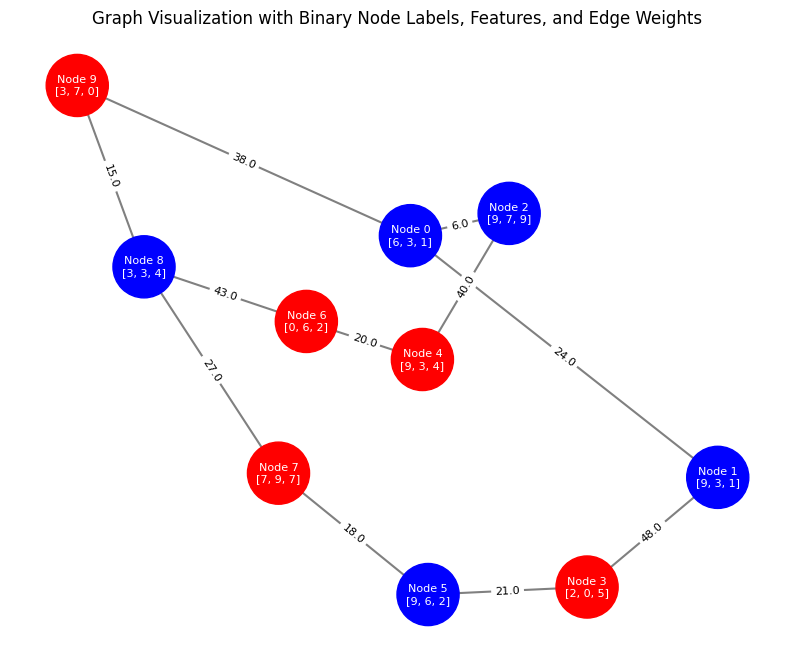

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# Convert to NetworkX for visualization
G = to_networkx(data, edge_attrs=["edge_attr"])

# Map labels to colors
label_color_map = {0: 'blue', 1: 'red'}
node_colors = [label_color_map[label.item()] for label in data.y]

# Add edge weights as labels
edge_labels = {(u, v): f"{d['edge_attr']:.1f}" for u, v, d in G.edges(data=True)}

# Plot the graph
plt.figure(figsize=(10, 8))
pos = nx.spring_layout(G, seed=15)  # Positioning algorithm

# Draw nodes with larger size and color based on labels
nx.draw_networkx_nodes(G, pos, node_color=node_colors, node_size=2000)

# Draw edges
nx.draw_networkx_edges(G, pos, width=1.5, edge_color="gray")

# Draw labels inside the nodes with features
node_label_dict = {i: f"Node {i}\n{data.x[i].tolist()}" for i in range(data.num_nodes)}
nx.draw_networkx_labels(G, pos, labels=node_label_dict, font_size=8, font_color="white")

# Draw edge weights as labels
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=8, label_pos=0.5)

plt.title("Graph Visualization with Binary Node Labels, Features, and Edge Weights")
plt.axis("off")
plt.show()

---
<font color=green>Q:</font>
<br><font color='green'>
Determine the Weighted Adjacency matrix based on the graph
</font>

---

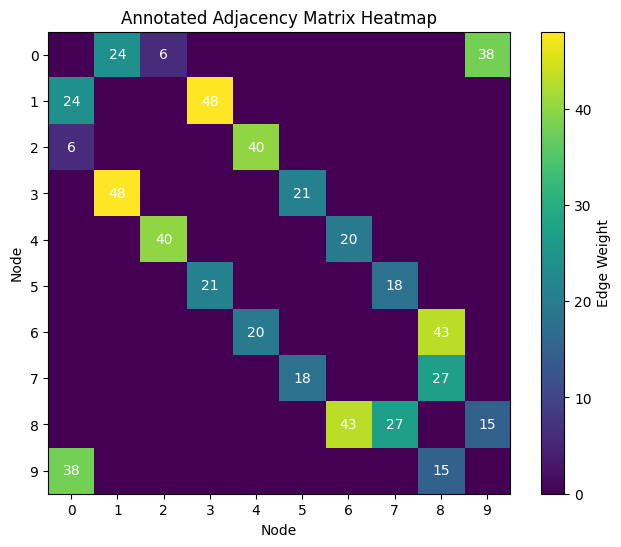

In [ ]:
# num_nodes
num_nodes = data.num_nodes

# Initialize adjacency matrix
weighted_adj_matrix = np.zeros((num_nodes, num_nodes))

# Fill adjacency matrix with weights
for k, w in enumerate(edge_weight):
    s, t = edge_list[:, k]  # Extract source and target nodes
    weighted_adj_matrix[s, t] = w
    weighted_adj_matrix[t, s] = w  # Assuming undirected graph

# Plot heatmap
plt.figure(figsize=(8, 6))
heatmap = plt.imshow(weighted_adj_matrix, cmap='viridis', interpolation='nearest')

# Add colorbar
plt.colorbar(label='Edge Weight')

# Add annotations
for i in range(num_nodes):
    for j in range(num_nodes):
        if weighted_adj_matrix[i, j] != 0:  # Annotate only non-zero weights
            plt.text(j, i, f"{weighted_adj_matrix[i, j]:.0f}", ha='center', va='center', color='white')

# Labels and title
plt.title('Annotated Adjacency Matrix Heatmap')
plt.xlabel('Node')
plt.ylabel('Node')
plt.xticks(range(num_nodes))
plt.yticks(range(num_nodes))
plt.grid(False)
plt.show()

# Exercise: Create the following graph:

<center><img width=“700" src = "https://drive.google.com/uc?export=view&id=1-Pg6IOPB1oMjxL6J4ki1JZ2j0SdKzAfo"></center>


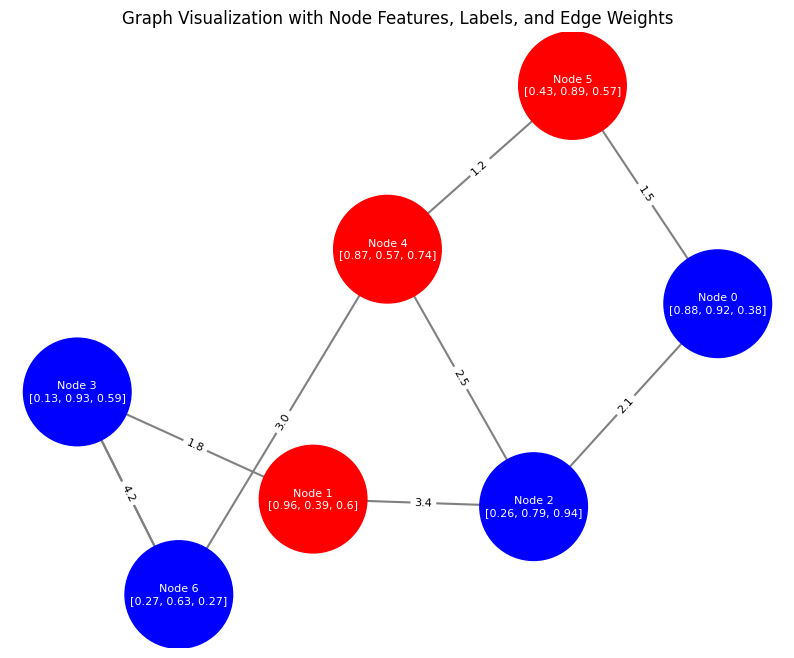

In [ ]:
import torch
from torch_geometric.data import Data
import networkx as nx
import matplotlib.pyplot as plt

# Set random seed for reproducibility
torch.manual_seed(42)

# Step 1: Define the edges of the graph
# The edge list defines connections between nodes.
# Each pair [i, j] indicates an edge from node i to node j.
edge_list = torch.tensor([
    [0, 1, 1, 2, 4, 5, 6, 5, 3],  # Source Nodes
    [2, 2, 3, 4, 6, 0, 3, 4, 6]   # Target Nodes
], dtype=torch.long)

# Step 2: Define weights for the edges
# Each edge has a corresponding weight, which indicates the strength of the connection.
edge_weights = torch.tensor([
    2.1, 3.4, 1.8, 2.5, 3.0, 1.5, 4.2, 1.2, 4.2
])

# Step 3: Assign labels to nodes
# Labels indicate categories for each node: 0 (Blue) or 1 (Red).
node_labels = torch.tensor([0, 1, 0, 0, 1, 1, 0])  # Example labels

# Step 4: Assign features to nodes
# Each node has a 3-dimensional feature vector representing its properties.
node_features = torch.rand(7, 3)  # 7 nodes, 3 features per node

# Step 5: Create a PyTorch Geometric Data object
# Combine all the components (edges, features, weights, and labels) into a graph data structure.
data = Data(edge_index=edge_list, edge_attr=edge_weights, x=node_features, y=node_labels)

# Step 6: Convert the data to NetworkX format for visualization
G = to_networkx(data, edge_attrs=["edge_attr"])

# Map labels to colors for visualization
label_color_map = {0: 'blue', 1: 'red'}
node_colors = [label_color_map[label.item()] for label in data.y]

# Add edge weights as labels for better visualization
edge_labels = {(u, v): f"{d['edge_attr']:.1f}" for u, v, d in G.edges(data=True)}

# Plot the graph
plt.figure(figsize=(10, 8))
pos = nx.spring_layout(G, seed=42)  # Generate positions for the nodes

# Draw nodes with colors based on their labels
nx.draw_networkx_nodes(G, pos, node_color=node_colors, node_size=6000)

# Draw edges with gray color
nx.draw_networkx_edges(G, pos, width=1.5, edge_color="gray")

# Add node labels with features displayed inside the nodes
node_label_dict = {
    i: f"Node {i}\n{[round(v, 2) for v in data.x[i].tolist()]}" for i in range(data.num_nodes)
}
nx.draw_networkx_labels(G, pos, labels=node_label_dict, font_size=8, font_color="white")

# Add edge weights as labels on the edges
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=8, label_pos=0.5)

# Finalize the plot
plt.title("Graph Visualization with Node Features, Labels, and Edge Weights")
plt.axis("off")  # Remove axes for clarity
plt.show()

# Contact

If you have any question regarding this notebook, do not hesitate to contact: hachem.madmoun@gmail.com

